#Example

Consider sequences that are increasingly different. EDeN allows to turn them into vectors, whose similarity is decreasing.

In [1]:
%matplotlib inline

Build an artificial dataset: starting from the string 'abcdefghijklmnopqrstuvwxyz', generate iteratively strings by swapping two characters at random. In this way instances are progressively more dissimilar

In [2]:
import random

def make_data(size):
    text = ''.join([str(unichr(97+i)) for i in range(26)])
    seqs = []

    def swap_two_characters(seq):
        '''define a function that swaps two characters at random positions in a string '''
        line = list(seq)
        id_i = random.randint(0,len(line)-1)
        id_j = random.randint(0,len(line)-1)
        line[id_i], line[id_j] = line[id_j], line[id_i]
        return ''.join(line)

    for i in range(size):
        text = swap_two_characters( text )
        seqs.append( text )
        print text
        
    return seqs

In [3]:
seqs = make_data(25)

abcdefghijkmlnopqrstuvwxyz
abcdxfghijkmlnopqrstuvweyz
abcdxfgkijhmlnopqrstuvweyz
obcdxfgkijhmlnapqrstuvweyz
obcdxfgkijhvlnapqrstumweyz
obcdxfgkijhvlnapqrstumweyz
obcdxfgkujhvlnapqrstimweyz
otcdxfgkujhvlnapqrsbimweyz
otcdxfgkujhvlnapbrsqimweyz
ytcdxfgkujhvlnapbrsqimweoz
atcdxfgkujhvlnypbrsqimweoz
atcdxfikujhvlnypbrsqgmweoz
atbdxfikujhvlnypcrsqgmweoz
atbdjfikuxhvlnypcrsqgmweoz
atbdjhikuxfvlnypcrsqgmweoz
atbdjhzkuxfvlnypcrsqgmweoi
atbdjhzkuxfvlnyicrsqgmweop
awbdjhzkuxfvlnyicrsqgmteop
awbdjhzkuxfvlsyicrnqgmteop
awbdjhzkuxfvlsyicrnqtmgeop
awbsjhzkuxfvldyicrnqtmgeop
agbsjhzkuxfvldyicrnqtmweop
agbsjdzkuxfvlhyicrnqtmweop
agbsjdqkuxfvlhyicrnztmweop
agbsjdqkuxfvlhyicwnztmreop


define a function that builds a graph from a string, i.e. the path graph with the characters as node labels

In [4]:
import networkx as nx

def sequence_to_graph(seq):
    '''convert a sequence into a EDeN 'compatible' graph
    i.e. a graph with the attribute 'label' for every node and edge'''
    G = nx.Graph()
    for id,character in enumerate(seq):
        G.add_node(id, label = character )
        if id > 0:
            G.add_edge(id-1, id, label = '-')
    return G

make a generator that yields graphs: generators are 'good' as they allow functional composition

In [5]:
def pre_process(iterable):
    for seq in iterable:
        yield sequence_to_graph(seq)

initialize the vectorizer object with the desired 'resolution'

In [6]:
%%time
from eden.graph import Vectorizer
vectorizer = Vectorizer( complexity = 4 )

CPU times: user 139 ms, sys: 110 ms, total: 249 ms
Wall time: 331 ms


obtain an iterator over the sequences processed into graphs

In [7]:
%%time
graphs = pre_process( seqs )

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 6.2 µs


compute the vector encoding of each instance in a sparse data matrix

In [8]:
%%time
X = vectorizer.transform( graphs )
print 'Instances: %d ; Features: %d with an avg of %d features per instance' % (X.shape[0], X.shape[1],  X.getnnz()/X.shape[0])

Instances: 25 ; Features: 1048577 with an avg of 599 features per instance
CPU times: user 460 ms, sys: 15.8 ms, total: 476 ms
Wall time: 473 ms


compute the pairwise similarity as the dot product between the vector representations of each sequence

In [9]:
from sklearn import metrics

K=metrics.pairwise.pairwise_kernels(X, metric='linear')
print K

[[ 1.          0.56228675  0.33769148  0.19905347  0.14222445  0.14222445
   0.11383999  0.09230998  0.07920908  0.07614308  0.08296049  0.07606405
   0.07120395  0.06749513  0.06568933  0.0623502   0.05895679  0.05887773
   0.05385955  0.05030224  0.04856311  0.05030224  0.05197472  0.05204137
   0.05552622]
 [ 0.56228675  1.          0.60896138  0.39792015  0.19601458  0.19601458
   0.16382356  0.13059198  0.11749108  0.09866611  0.1073017   0.092395
   0.08272978  0.07079764  0.06888933  0.06388353  0.06049012  0.05881107
   0.05379289  0.05023557  0.04849644  0.05183557  0.05350806  0.0535747
   0.05545955]
 [ 0.33769148  0.60896138  1.          0.5938797   0.29512062  0.29512062
   0.1921417   0.15388681  0.14078591  0.12196094  0.12892405  0.10251645
   0.09452371  0.07758577  0.07230751  0.06730171  0.0639083   0.06222925
   0.05898928  0.05365375  0.05009644  0.05525375  0.05350224  0.05694698
   0.06046482]
 [ 0.19905347  0.39792015  0.5938797   1.          0.48318995  0.48318

visualize it as a picture is worth thousand words...

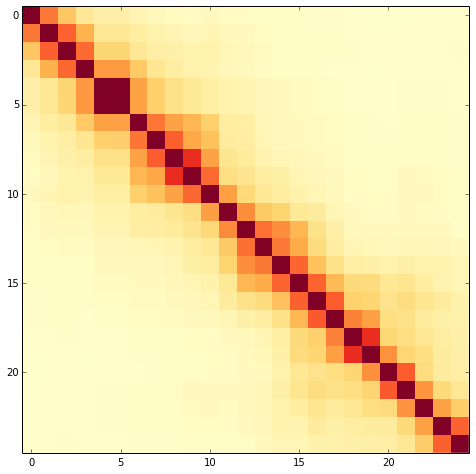

In [10]:
import pylab as plt
plt.figure( figsize=(8,8) )
img = plt.imshow( K, interpolation='none', cmap=plt.get_cmap( 'YlOrRd' ) )
plt.show()